In [274]:
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image



In [231]:
df = pd.read_excel (r'/home/imad/Desktop/Becode/Project/challenge-mole/CLIN_DIA.xlsx')
df

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,d1,1,0,Compound Nevus,1
1,Compound Nävus,d2,2,0,Compound Nevus,1
2,Dysplastischer Nävus,d3,3,0,Compound Nevus,1
3,Compound Nävus,d4,4,0,Compound Nevus,1
4,Dermaler Nävus,d5,5,0,Compound Nevus,1
...,...,...,...,...,...,...
2995,Compound Nevus,f996,2996,0,Compound Nevus,1
2996,Compound Nevus,f997,2997,0,Compound Nevus,1
2997,Compound Nevus,f998,2998,0,Compound Nevus,1
2998,Compound Nevus,f999,2999,0,Compound Nevus,1


In [233]:
df = df[df["kat.Diagnose"] != 0]
df = df[df["kat.Diagnose"] != "?"]
df['kat.Diagnose'] = df['kat.Diagnose'].replace([1], 0).replace([2, 3], 1)
df["id"] = df["id"].apply(lambda x : x.upper())

df

,klin. Diagn.,id,nr,Histo performed,Diagnose red.,kat.Diagnose
0,Compound Nävus,D1,1,0,Compound Nevus,0
1,Compound Nävus,D2,2,0,Compound Nevus,0
2,Dysplastischer Nävus,D3,3,0,Compound Nevus,0
3,Compound Nävus,D4,4,0,Compound Nevus,0
4,Dermaler Nävus,D5,5,0,Compound Nevus,0
...,...,...,...,...,...,...
2995,Compound Nevus,F996,2996,0,Compound Nevus,0
2996,Compound Nevus,F997,2997,0,Compound Nevus,0
2997,Compound Nevus,F998,2998,0,Compound Nevus,0
2998,Compound Nevus,F999,2999,0,Compound Nevus,0


In [315]:
images = os.listdir("Mole_Data")

cancerous = []
not_cancerous = []
# image_index = []
# for i in images:
#     image_index.append(i)

for i in range(len(images)):

    try:
        if df["kat.Diagnose"][i] == 0.0:
            not_cancerous.append(images[i])
            
        elif df["kat.Diagnose"][i] == 1.0:
            cancerous.append(images[i])
    except KeyError:
        continue


In [316]:
print(len(cancerous))
print(len(not_cancerous))

610
2230


In [317]:
for i in cancerous:
    x = Image.open("./Mole_Data/" + i)
    x.save("./data/cancerous/" + i)

In [318]:
for n in not_cancerous:
    y = Image.open("./Mole_Data/" + n)
    y.save("./data/not_cancerous/" + n)

In [288]:
len(images[1])

7

In [319]:
# path = "/home/imad/Desktop/Becode/Project/challenge-mole/samples/F995.BMP" #/home/imad/Desktop/Becode/Project/challenge-mole/samples
path = "/home/imad/Desktop/Becode/Project/challenge-mole/Mole_Data/D900.BMP"
img = cv.imread(path)
cv.imshow('origin',img)
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('gray',gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [320]:
img.shape
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray.shape

(387, 632, 3)

In [314]:
# canerous_set = np.load("/home/imad/Desktop/Becode/Project/challenge-mole/data/cancerous")
# canerous_set = np.load("/home/imad/Desktop/Becode/Project/challenge-mole/data/not_cancerous")

In [321]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [322]:
canerous_set = load_images_from_folder("/home/imad/Desktop/Becode/Project/challenge-mole/data/cancerous")
not_canerous_set = load_images_from_folder("/home/imad/Desktop/Becode/Project/challenge-mole/data/not_cancerous")

In [323]:
canerous_set = np.array(canerous_set)
not_canerous_set = np.array(not_canerous_set)

Text(0, 0.5, 'number of samples')

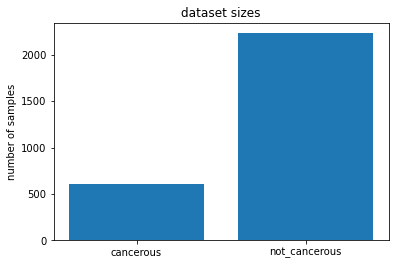

In [325]:
plt.bar([0,1], [canerous_set.shape[0], not_canerous_set.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1], ['cancerous', 'not_cancerous'])
plt.ylabel('number of samples')

Text(0, 0.5, 'number of samples')

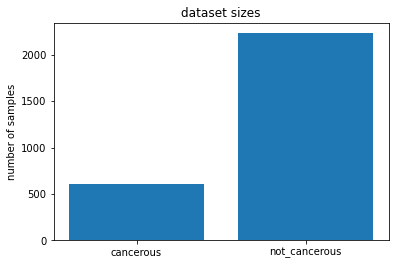

In [327]:
# max_samples = min(canerous_set.shape[0], not_canerous_set.shape[0])
# preprocessed_canerous_set = canerous_set[:max_samples].reshape(-1,28,28)
# preprocessed_not_canerous_set = not_canerous_set[:max_samples].reshape(-1,28,28)
plt.bar([0,1], [canerous_set.shape[0], not_canerous_set.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1], ['cancerous', 'not_cancerous'])
plt.ylabel('number of samples')

In [ ]:
canerous_set_labels = np.zeros((max_samples, 1))
not_canerous_set_labels = np.ones((max_samples, 1))